# Завдання 3. Рівняння Пуассона, яке задане у полярній системі координат

Загальний вигляд рівняння:
$$
\Delta u(r, \varphi) = \frac{1}{r} \frac{\partial}{\partial r} 
\left( r \frac{\partial u}{\partial r} \right)
+ \frac{1}{r^2} \frac{\partial^2 u}{\partial \varphi^2}
= f(r, \varphi)
$$


\begin{array}{l}

\dfrac{\partial }{\partial r}\left( r\dfrac{\partial u}{\partial r}\right) 
\approx \dfrac{r_{i+0.5}\dfrac{\partial u}{\partial r}_{i+0.5,j} - r_{i-0.5}\dfrac{\partial u}{\partial r}_{i-0.5,j}}{\Delta r} 
\approx \dfrac{r_{i+0.5}\dfrac{u_{i+1,j} - u_{i,j}}{\Delta r} - r_{i-0.5}\dfrac{u_{i,j} - u_{i-1,j}}{\Delta r}}{\Delta r} 
= \dfrac{r_{i+0.5}(u_{i+1,j} - u_{i,j}) - r_{i-0.5}(u_{i,j} - u_{i-1,j})}{\Delta r^{2}} \\[1.2em]

\dfrac{1}{r}\dfrac{\partial }{\partial r}\left( r\dfrac{\partial u}{\partial r}\right) 
\approx \dfrac{r_{i+0.5}(u_{i+1,j} - u_{i,j}) - r_{i-0.5}(u_{i,j} - u_{i-1,j})}{r_{i}\Delta r^{2}} \\[1.2em]

\dfrac{1}{r^{2}}\dfrac{\partial ^{2} u}{\partial \varphi ^{2}} 
\approx \dfrac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{r_{i}^{2}\Delta \varphi ^{2}} \\[1.2em]
\\
\dfrac{1}{r}\dfrac{\partial }{\partial r}\left( r\dfrac{\partial u}{\partial r}\right) 
+ \dfrac{1}{r^{2}}\dfrac{\partial ^{2} u}{\partial \varphi ^{2}} 
\approx 
\dfrac{r_{i+0.5}(u_{i+1,j} - u_{i,j}) - r_{i-0.5}(u_{i,j} - u_{i-1,j})}{r_{i}\Delta r^{2}} 
+ \dfrac{u_{i,j+1} - 2u_{i,j} + u_{i,j-1}}{r_{i}^{2}\Delta \varphi ^{2}} \\[1.2em]

= \boxed{\frac{r_{i-0.5}}{r_{i} \Delta r^{2}} u_{i-1,j} +\frac{r_{i+0.5}}{r_{i} \Delta r^{2}} u_{i+1,j} +\frac{1}{r_{i}^{2} \Delta \varphi ^{2}} u_{i,j-1} +\frac{1}{r_{i}^{2} \Delta \varphi ^{2}} u_{i,j+1} -\left(\frac{r_{i+0.5} +r_{i-0.5}}{r_{i} \Delta r^{2}} +\frac{2}{r_{i}^{2} \Delta \varphi ^{2}}\right) u_{i,j} = f(r_i, \varphi_j)}
\end{array}


**Задача 3.4**

$$
r \in [0.7; 2.0], \quad \varphi \in \left[0, \frac{\pi}{4}\right],
\quad f(r, \varphi) = r\sin \varphi
$$

$$
u(0.7, \varphi) = 0, 
\quad \frac{\partial u}{\partial r}(2.0, \varphi) = \varphi^2
$$

$$
2u + 3\frac{\partial u}{\partial \varphi}(r, 0) = 1,
\quad
u - 2\frac{\partial u}{\partial \varphi}\left(r, \frac{\pi}{4}\right) = 0
$$


Граничні умови:


$
u(0.7, \varphi) = 0, \Rightarrow \boxed{U_{1,j} = 0}
$

$
\frac{\partial u}{\partial r}(2.0, \varphi) = \varphi^2 \Rightarrow \boxed{U_{n_r,j} = U_{n_r-1,j}+\varphi^2_j\Delta r}
$

$
2u + 3\frac{\partial u}{\partial \varphi}(r, 0) = 1, \Rightarrow \boxed{U_{i,1} =\frac{3U_{i,2} }{3-2\Delta \varphi } -\frac{\Delta \varphi}{3-2\Delta \varphi }}
$

$
u - 2\frac{\partial u}{\partial \varphi}\left(r, \frac{\pi}{4}\right) = 0 \Rightarrow \boxed{U_{i,n_{\varphi }} =\frac{2U_{i,n_{\varphi } -1}}{2-\Delta \varphi }}
$

In [9]:
from solver import relax2d 
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def f_fun(r, phi):
    """Right-hand side f(r, φ) = r sin φ."""
    return r * np.sin(phi)

In [11]:
class PolarGridConfig:
    """
    Polar grid on a sector:
        r in [Rmin, Rmax], φ in [Phimin, Phimax].
    Stores 1D vectors, spacings, and 2D meshes.
    """
    def __init__(self,
                 nr=121,
                 nphi=64,
                 Rmin=0.7,
                 Rmax=2.0,
                 Phimin=0.0,
                 Phimax=np.pi/4):

        self.nr = nr
        self.nphi = nphi
        self.Rmin = Rmin
        self.Rmax = Rmax
        self.Phimin = Phimin
        self.Phimax = Phimax

        self.r = np.linspace(Rmin, Rmax, nr)
        self.phi = np.linspace(Phimin, Phimax, nphi)

        self.dr = (Rmax - Rmin) / (nr - 1)
        self.dphi = (Phimax - Phimin) / (nphi - 1)

        # 2D meshes
        self.R, self.Phi = np.meshgrid(self.r, self.phi, indexing='ij')


In [12]:
def assemble_system(cfg):
    nr, nphi = cfg.nr, cfg.nphi
    dr, dphi = cfg.dr, cfg.dphi
    R, Phi   = cfg.R, cfg.Phi   # 2D meshgrid
    r        = cfg.r            # 1D, shape (nr,)
    phi      = cfg.phi          # 1D, shape (nphi,)

    ax = np.zeros((nr, nphi))   
    cx = np.zeros((nr, nphi))   
    ay = np.zeros((nr, nphi))  
    cy = np.zeros((nr, nphi))  
    b  = np.zeros((nr, nphi))  
    rhs = np.zeros((nr, nphi))  

    r_iphalf = np.zeros(nr) 
    r_imhalf = np.zeros(nr)  

    # Внутрішні піввузли
    r_iphalf[:-1] = 0.5 * (r[:-1] + r[1:])
    r_iphalf[-1]  = r_iphalf[-2]  

    r_imhalf[1:] = 0.5 * (r[:-1] + r[1:])
    r_imhalf[0]  = r_imhalf[1]

    ri   = r.reshape(-1, 1)        
    r_ip = r_iphalf.reshape(-1, 1) 
    r_im = r_imhalf.reshape(-1, 1) 

    inv_dr2   = 1.0 / (dr * dr)
    inv_dphi2 = 1.0 / (dphi * dphi)

    ax[:, :] = r_im * inv_dr2 / ri
    cx[:, :] = r_ip * inv_dr2 / ri
    ay[:, :] = inv_dphi2 / (ri ** 2)
    cy[:, :] = ay.copy()

    b[:, :]  = ax + cx + ay + cy

    # Права частина
    rhs[:, :] = f_fun(R, Phi)

    # ------------------------------------------------------------------
    # ГРАНИЧНІ УМОВИ
    # ------------------------------------------------------------------

    # 1) r = 0.7: Dirichlet, u(0.7, φ) = 0  → U_{1,j} = 0
    i = 0
    b[i, :]   = 1.0
    ax[i, :]  = 0.0
    cx[i, :]  = 0.0
    ay[i, :]  = 0.0
    cy[i, :]  = 0.0
    rhs[i, :] = 0.0

    # 2) r = 2.0: Neumann, ∂u/∂r (2.0, φ) = φ^2
    i = nr - 2
    cx_old = cx[i, :].copy()
    cx[i, :] = 0.0
    b[i, :]  -= cx_old
    rhs[i, :] -= cx_old * (phi ** 2 * dr)

    # 3) φ = 0: Robin, 2u + 3 ∂u/∂φ (r, 0) = 1
    alpha0 = 3.0 / (3.0 - 2.0 * dphi)
    beta0  = -dphi / (3.0 - 2.0 * dphi)
    j = 1  
    ay_old = ay[:, j].copy()
    ay[:, j] = 0.0
    b[:, j]  -= ay_old * alpha0
    rhs[:, j] -= ay_old * beta0

    # 4) φ = π/4: Robin, u - 2 ∂u/∂φ (r, π/4) = 0
    alpha1 = 2.0 / (2.0 - dphi)
    j = nphi - 2  
    cy_old = cy[:, j].copy()
    cy[:, j] = 0.0
    b[:, j]  -= cy_old * alpha1


    return ax, ay, cx, cy, b, rhs

In [13]:
def apply_boundary_values(U, cfg: PolarGridConfig):
    nr, nphi = cfg.nr, cfg.nphi
    dr, dphi = cfg.dr, cfg.dphi
    phi_vec = cfg.phi

    U[0, :] = 0

    U[nr - 1, :] = U[nr - 2, :] + phi_vec**2*dr

    U[:, 0] = (dphi - 3.0*U[:, 1]) / (2.0*dphi - 3.0)

    U[:, nphi - 1] = 2*U[:, nphi - 2] / (2.0 - dphi)

    return U

In [ ]:
nr=100
nphi=100
cfg = PolarGridConfig(nr=nr, nphi=nphi)

ar, aphi, cr, cphi, b, rhs = assemble_system(cfg)

U0 = np.zeros((cfg.nr, cfg.nphi))
U0 = apply_boundary_values(U0, cfg)

# SOR iteration on interior nodes
U = relax2d(
    ar, aphi, cr, cphi, b, rhs,
    cfg.nr, cfg.nphi, U0,
    omega=1.9, eps=1e-10, max_iter=50000
)

U_final = apply_boundary_values(U, cfg)

iter= 500 err= 0.000818390707294836
iter= 1000 err= 0.0006658287577727684
iter= 1500 err= 0.0005437242888417515
iter= 2000 err= 0.00044402397293752394
iter= 2500 err= 0.00036260532549747815
iter= 3000 err= 0.0002961160438199606
iter= 3500 err= 0.00024181859791205795
iter= 4000 err= 0.0001974774265600665
iter= 4500 err= 0.00016126689318962661
iter= 5000 err= 0.0001316961198680744
iter= 5500 err= 0.00010754760412989839
iter= 6000 err= 8.782709138088762e-05
iter= 6500 err= 7.172263894261732e-05
iter= 7000 err= 5.857118636454217e-05
iter= 7500 err= 4.7831255550523366e-05
iter= 8000 err= 3.9060656777056835e-05
iter= 8500 err= 3.189828262728511e-05
iter= 9000 err= 2.604924029547817e-05
iter= 9500 err= 2.1272710127639982e-05
iter= 10000 err= 1.737203047413871e-05
iter= 10500 err= 1.4186600622245749e-05
iter= 11000 err= 1.1585268491209888e-05
iter= 11500 err= 9.460930744165097e-06
iter= 12000 err= 7.726123101736704e-06
iter= 12500 err= 6.309419213756939e-06
iter= 13000 err= 5.152489840565266e-

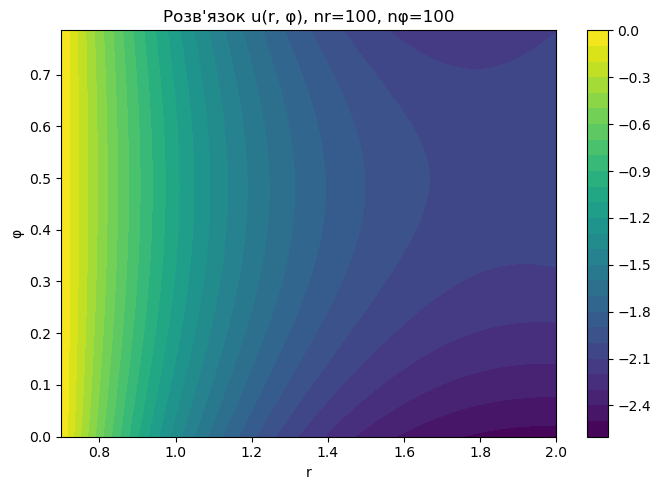

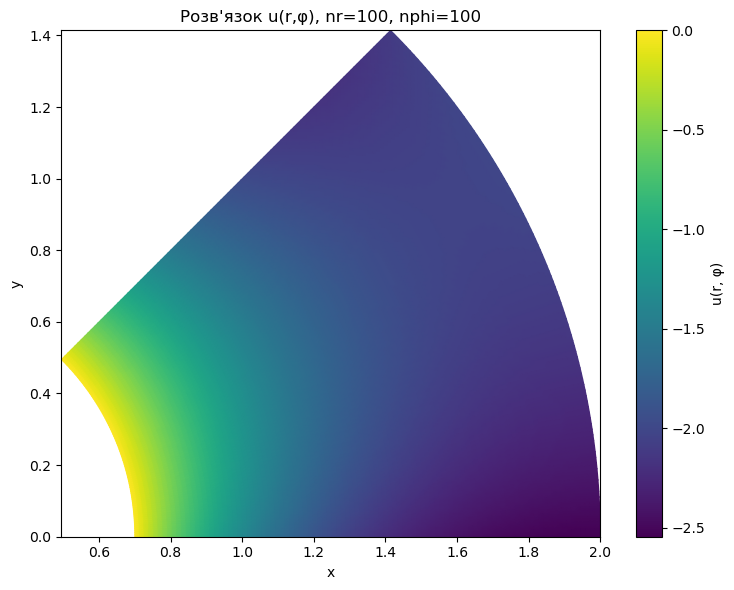

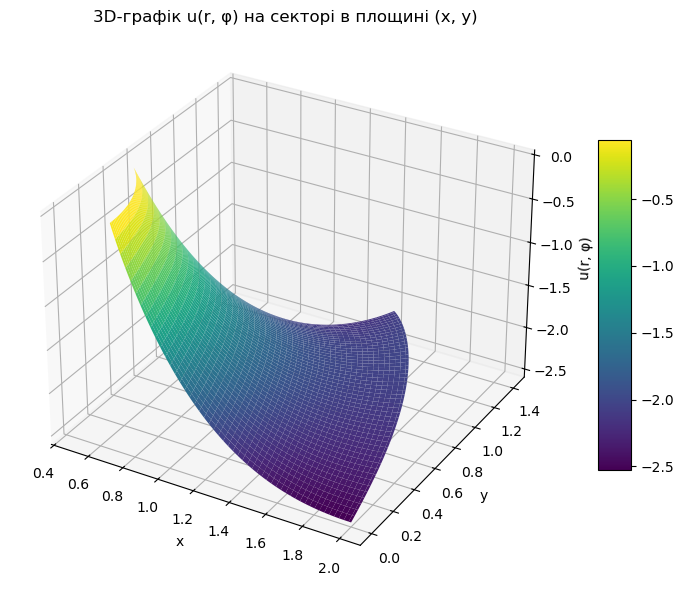

In [20]:
# --- Візуалізація ---
R = cfg.R
Phi = cfg.Phi
r = cfg.r
phi = cfg.phi
dr = cfg.dr
dphi = cfg.dphi
# ---------------------------
# 2D: контур у координатах (r, φ)
# ---------------------------
plt.figure(figsize=(7, 5))
cs = plt.contourf(R, Phi, U_final, levels=30)
plt.colorbar(cs)
plt.title(f"Розв'язок u(r, φ), nr={R.shape[0]}, nφ={R.shape[1]}")
plt.xlabel("r")
plt.ylabel("φ")
plt.tight_layout()
plt.show()

# Для коректного відображення полярних даних, перетворимо їх в декартові координати
R_mesh, PHI_mesh = np.meshgrid(r, phi, indexing='ij')
X = R_mesh * np.cos(PHI_mesh)
Y = R_mesh * np.sin(PHI_mesh)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
c = ax.pcolormesh(X, Y, U_final, shading='gouraud', cmap='viridis')
fig.colorbar(c, label="u(r, φ)")
ax.set_title(f"Розв'язок u(r,φ), nr={nr}, nphi={nphi}")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_aspect('equal', 'box')
plt.tight_layout()
plt.show()

# ---------------------------
# 3D поверхня у площині (x, y)
# ---------------------------
X = R * np.cos(Phi)
Y = R * np.sin(Phi)

fig = plt.figure(figsize=(8, 6))
ax3 = fig.add_subplot(111, projection='3d')
surf = ax3.plot_surface(X, Y, U_final, cmap='viridis', edgecolor='none')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('u(r, φ)')
ax3.set_title("3D-графік u(r, φ) на секторі в площині (x, y)")
fig.colorbar(surf, ax=ax3, shrink=0.6, aspect=10)
plt.tight_layout()
plt.show()

In [21]:
# --- Verification ----------------------------------------------------------
pde_residual = np.zeros_like(U_final)        # (nr, nphi)

for i in range(1, nr - 1):                 
    ri    = r[i]
    r_ip  = ri + dr/2.0
    r_im  = ri - dr/2.0
    for j in range(1, nphi - 1):            
        phij = phi[j]

        lap = ((r_im / (ri * dr**2)) * U_final[i-1, j] +
               (r_ip / (ri * dr**2)) * U_final[i+1, j] +
               (1.0 / (ri**2 * dphi**2)) * (U_final[i, j-1] + U_final[i, j+1]) -
               ((r_ip + r_im) / (ri * dr**2) + 2.0 / (ri**2 * dphi**2)) * U_final[i, j])

        pde_residual[i, j] = lap - f_fun(ri, phij)

# 2. Перевірка граничних умов
bc_inner_r  = np.abs(U_final[0, 1:-1])                                            
bc_outer_r  = np.abs((U_final[nr-1, 1:-1] - U_final[nr-2, 1:-1]) / dr - phi[1:-1]**2)     

bc_phi_0    = np.abs(2.0 * U_final[1:-1, 0] +
                     3.0 * (U_final[1:-1, 1] - U_final[1:-1, 0]) / dphi - 1.0)      

bc_phi_pi4  = np.abs(U_final[1:-1, nphi-1] -
                     2.0 * (U_final[1:-1, nphi-1] - U_final[1:-1, nphi-2]) / dphi)  

print("--- Verification Results ---")
print(f"PDE residual (interior)  : {np.max(np.abs(pde_residual[1:-1, 1:-1])): .2e}")
print(f"BC at r=0.7 (Dirichlet)  : {np.max(bc_inner_r): .2e}")
print(f"BC at r=2.0 (Neumann)    : {np.max(bc_outer_r): .2e}")
print(f"BC at φ=0 (Robin)        : {np.max(bc_phi_0): .2e}")
print(f"BC at φ=π/4 (Robin)      : {np.max(bc_phi_pi4): .2e}")

--- Verification Results ---
PDE residual (interior)  :  4.61e-07
BC at r=0.7 (Dirichlet)  :  0.00e+00
BC at r=2.0 (Neumann)    :  1.69e-14
BC at φ=0 (Robin)        :  1.82e-13
BC at φ=π/4 (Robin)      :  6.35e-14
